In [ ]:
from  Hfps_dataset import HFPS_Dataset
import numpy as np
from torch.utils.data import DataLoader

In [ ]:
data_npz = "../Dataset/225_cases/03_01_Data.npz"
# load npz
data = np.load(data_npz)
# 访问保存的数组
tensor = data['tensor']
condition = data['Condition']
# 使用完数据后，确保关闭文件
data.close()
N = 10
slice_time = 1
dataset = HFPS_Dataset(data_numpy = tensor,
                       class_list = condition,
                       N_steps = N, slice_time = slice_time) 

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(tensor[0,1,:,:])

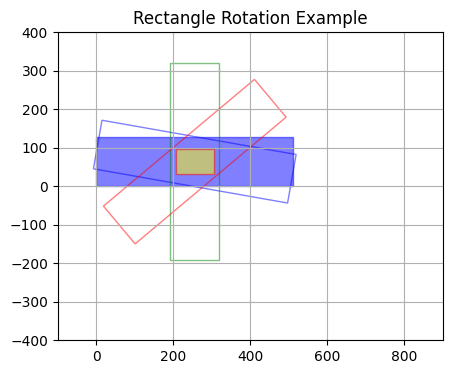

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.transforms as transforms

def create_rotated_rectangle(ax, center, width, height, angle, edgecolor='r', facecolor='none'):
    # 创建矩形，并计算旋转矩阵来确保矩形围绕中心旋转
    rect = patches.Rectangle((center[0] - width / 2, center[1] - height / 2), width, height, 
                             edgecolor=edgecolor, facecolor=facecolor, fill=True, alpha=0.5)

    # 通过矩形的中心旋转矩形
    trans = transforms.Affine2D().rotate_deg_around(center[0], center[1], angle)
    rect.set_transform(trans + ax.transData)  # 使用矩形的中心进行旋转
    ax.add_patch(rect)

# 设置图形大小和标题
fig, ax = plt.subplots(figsize=(8, 4))  # 调整画布大小
ax.set_xlim(-100, 900)  # 调整x轴界限
ax.set_ylim(-400, 400)  # 调整y轴界限
ax.set_title('Rectangle Rotation Example')
ax.set_aspect('equal')

# 主矩形窗口的中心点调整为(256, 64)
main_center = (256, 64)

# 主矩形窗口
create_rotated_rectangle(ax, main_center, 512, 128, 0, 'blue', 'blue')

# 中间窗口
create_rotated_rectangle(ax, main_center, 100, 64, 0, 'red', 'yellow')  # 假设中间窗口大小为 (100, 50)

# 旋转10度，围绕矩形中心旋转
create_rotated_rectangle(ax, main_center, 512, 128, -10, 'blue', 'none')
# 旋转90度，围绕矩形中心旋转
create_rotated_rectangle(ax, main_center, 512, 128, -90, 'green', 'none')
# 旋转40度，围绕矩形中心旋转
create_rotated_rectangle(ax, main_center, 512, 128, -140, 'red', 'none')

plt.grid(True)
plt.show()
